In [9]:
import pandas as pd
import numpy as np
import easyocr
import re
import matplotlib.pyplot as plt
import cv2
import os

In [1]:
reader = easyocr.Reader(['ch_tra', 'en'])

NameError: name 'easyocr' is not defined

In [111]:
result = reader.readtext('1.png')

In [112]:
res1=[text[1] for text in result]

In [8]:
def convert_list_to_text(data):
    text=""
    for i in data:
        text=text+" "+ i
    return text

def convert_from_array_to_list(data):
    list=[text[1] for text in data]
    return list


In [8]:
text=convert_list_to_text(res1)

In [6]:
result= reader.readtext('2.png')

In [11]:
res2=convert_from_array_to_list(result)

In [16]:
result= reader.readtext('3.png')

In [17]:
res3=convert_from_array_to_list(result)

In [18]:
result = reader.readtext('4.png')

In [19]:
res4=convert_from_array_to_list(result)

In [103]:
result = reader.readtext('5.png')

In [104]:
res5=convert_from_array_to_list(result)
res5

['SANTHOSH',
 'Technical Manager',
 '123 ABC St. Tirupur Tamilladu,',
 '641603',
 '+123-456-1234',
 'hello@Sun.com',
 'WWWSun.com',
 'Sun Electricals']

In [87]:
class data_extract():
    
    def find_phone_number(text):

        try:
            pattern=reg = r"(\d{3}-\d{3}-\d{4})"
            phone_num=re.findall(pattern,text)
            if phone_num:
                pass
            else:
                pattern=reg = r"(\d{2}-\d{3}-\d{4})"
                phone_num=re.findall(pattern,text)
        except:
            phone_num=""
            
        return phone_num

    def finding_email(text):
        try:
            regex = r"\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,7}\b"
            email=re.findall(regex,text)

        except:
            email=""
        
        return email

    def find_name(res1):
        try:
            name=res1[0]
        except:
            name=""
        
        return name


    def filter_email_text(text):
        try:
            email=data_extract.finding_email(text)
            list=[]
            for i in text.split(" "):
                if i not in email:
                    list.append(i)
        except:
            pass
            
        return list
    

    def find_designation(res1):
        try:
            designation=res1[1]
        except:
            designation=""

        return designation

    
    def find_link(text):
        try:
            org=[]
            text_up=data_extract.filter_email_text(text)
            for word in text_up:
                if word[-4:] == ".com":
                    org.append(word)

        except:
            org=""
        
        return org


    def finding_pincode(text):
        try:
            regex = r"[1-9][0-9]{5}"
            pin=re.findall(regex,text)

        except:
            pin=""
            
        return pin


    def state(text):
        try:
            for word in text.split(" "):
                if word.lower()[0:5] == "tamil":
                    state=word.lower()

        except:
            state=""

        return state
        

    def city(text):
        try:
            city=["erode,","salem,","chennai,","tirupur","hydrabad,","karur,","nammakal,"]
            for word in text.split(" "):
                if word.lower() in city:
                    city_f = word.lower()
        except:
            city_f=""

        return city_f


    def company(text):
        try:
            text=text.split(" ")
            company=text[-2:]
            company="".join(company)
            company=[company]
        except:
            company=""

        return company

    
    

In [88]:
def data_formatted(text,res):
    data={
        'name':[],
        'designation':[],
        'contact':"",
        'email':"",
        'company':"",
        'website':"",
        'city':[],
        'state':[],
        'pincode':"",
        }
    data['name'].append(data_extract.find_name(res))
    data['designation'].append(data_extract.find_designation(res))
    data['contact']=data_extract.find_phone_number(text)
    data['email']=data_extract.finding_email(text)
    data['company']=data_extract.company(text)
    data['website']=data_extract.find_link(text)
    data['city'].append(data_extract.city(text))
    data['state'].append(data_extract.state(text))
    data['pincode']=data_extract.finding_pincode(text)

    return data

In [114]:
text=convert_list_to_text(res1)
text

' Selva DATA MANAGER +123-456-7890 +123-456-7891 WWW.XYZ1.com hello@XYZ1.com 123 ABC St. Chennai, selva TamilNadu 600113 digitals'

In [115]:
data_formatted(text,res1)

{'name': ['Selva'],
 'designation': ['DATA MANAGER'],
 'contact': ['123-456-7890', '123-456-7891'],
 'email': ['hello@XYZ1.com'],
 'company': ['600113digitals'],
 'website': ['WWW.XYZ1.com'],
 'city': ['chennai,'],
 'state': ['tamilnadu'],
 'pincode': ['600113']}

In [73]:
def image_preview(image, res):
        for (bbox, text, prob) in res:
                (tl, tr, br, bl) = bbox
                tl = (int(tl[0]), int(tl[1]))
                tr = (int(tr[0]), int(tr[1]))
                br = (int(br[0]), int(br[1]))
                bl = (int(bl[0]), int(bl[1]))
                cv2.rectangle(image, tl, br, (255, 0, 0), 2)
                # cv2.putText(image, text, (tl[0], tl[1] - 10),
                #                 cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
        plt.rcParams['figure.figsize'] = (15, 5)
        plt.axis('off')
        plt.imshow(image)

In [62]:
image = cv2.imread("5.png")

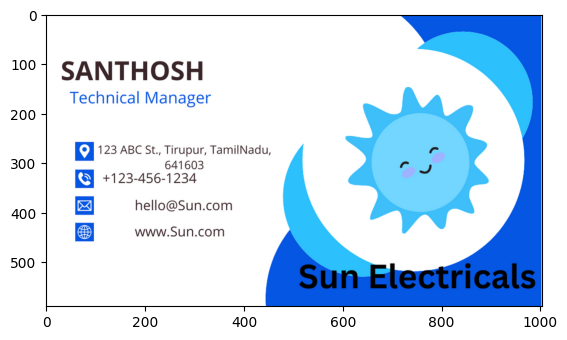

In [63]:
plt.imshow(image)

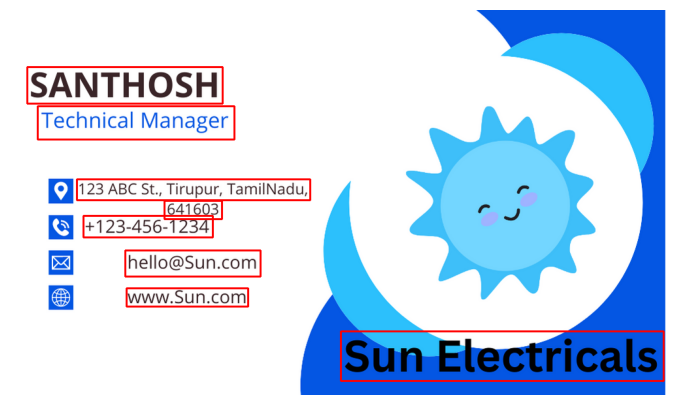

In [74]:
image_preview(image, result)

In [ ]:
def create_table:

mycursor.execute("""CREATE TABLE IF NOT EXISTS card_details (
    PERSON_ID INT NOT NULL AUTO_INCREMENT,
    NAME VARCHAR(30),
    DESIGNATION VARCHAR(100),
    CONTACT INT,
    EMAIL VARCHAR(100),
    COMPANY VARCHAR(100),
    WEBSITE VARCHAR(50),
    CITY VARCHAR(50),
    STATE VARCHAR(50),
    PINCODE INT,
    IMAGE BLOB
    )""")

In [12]:
res2

['Amitkumar',
 'CEO & FOUNDER',
 '123-456-7569',
 'hello@global.com',
 'TWTWW',
 'global.com',
 '123 global',
 'Erode,',
 'GLOBAL',
 'Tamilladu 600115',
 'INSURANCE',
 'St.,']

In [150]:
text=convert_list_to_text(res5)

In [151]:
text

' SANTHOSH Technical Manager 123 ABC St. Tirupur Tamilladu, 641603 +123-456-1234 hello@Sun.com WWWSun.com Sun Electricals'

In [166]:
values=data_formatted(text,res5)
values


{'name': ['SANTHOSH'],
 'designation': ['Technical Manager'],
 'contact': ['123-456-1234'],
 'email': ['hello@Sun.com'],
 'company': ['SunElectricals'],
 'website': ['WWWSun.com'],
 'city': ['tirupur'],
 'state': ['tamilladu,'],
 'pincode': ['641603']}

In [169]:
def format_values(values):
     value=[]
     for words in values:
         value.append(values[words][0])
     return tuple(value)

In [172]:
li=format_values(values)

In [145]:
a=format_values(values)

In [146]:
la=pd.DataFrame(a)

In [147]:
la

,name,designation,contact,email,company,website,city,state,pincode
0,SANTHOSH,Technical Manager,123-456-1234,hello@Sun.com,SunElectricals,WWWSun.com,tirupur,"tamilladu,",641603


In [173]:
li

('SANTHOSH',
 'Technical Manager',
 '123-456-1234',
 'hello@Sun.com',
 'SunElectricals',
 'WWWSun.com',
 'tirupur',
 'tamilladu,',
 '641603')

In [6]:
state=""
if state :
    print("yes")

else:
    print("no")

no


In [7]:
val=("Sds","sddsf","dfdsfdsf")

In [10]:
pd.DataFrame(val)

,0
0,Sds
1,sddsf
2,dfdsfdsf


In [22]:
def dict_format(values):
    data={
        'name':[],
        'designation':[],
        'contact':[],
        'email':[],
        'company':[],
        'website':[],
        'city':[],
        'state':[],
        'pincode':[],
        'image':[]
        }
    data['name'].append(values[0])
    data['designation'].append(values[1])
    data['contact'].append(values[2])
    data['email'].append(values[3])
    data['company'].append(values[4])
    data['website'].append(values[5])
    data['city'].append(values[6])
    data['state'].append(values[7])
    data['pincode'].append(values[8])
    data['image'].append(values[9])

    return data

In [14]:
valeo=("fffrf","fefs","rfefe","frefe","dfdfdf","dsfdfds","dfdfds","fdf","dvdfvdv","fdvdf")

In [16]:
a=dict_tables(valeo)

In [17]:
a

{'name': ['fffrf'],
 'designation': ['fefs'],
 'contact': ['rfefe'],
 'email': ['frefe'],
 'company': ['dfdfdf'],
 'website': ['dsfdfds'],
 'city': ['dfdfds'],
 'state': ['fdf'],
 'pincode': ['dvdfvdv'],
 'image': ['fdvdf']}

In [21]:
pd.DataFrame(a)

,name,designation,contact,email,company,website,city,state,pincode,image
0,fffrf,fefs,rfefe,frefe,dfdfdf,dsfdfds,dfdfds,fdf,dvdfvdv,fdvdf


In [ ]:
SELECT NAME,DESIGNATION,CONTACT,EMAIL,COMPANY,WEBSITE,CITY,STATE,PINCODE FROM bussiness_card.card_details;